In [121]:
import os
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict, GridSearchCV, LeaveOneGroupOut
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
import matplotlib.pyplot as plt

In [122]:
embs = pd.read_csv('/neurospin/dico/jlaval/Output/V1_FIP_right/14-06-27_101/FIP_right_custom_embeddings/custom_cross_val_embeddings.csv')
labels = pd.read_csv('/neurospin/dico/data/deep_folding/current/datasets/hcp/FIP/FIP_labels.csv')
labels = labels.loc[labels['Subject'].isin(embs['ID'])]['Right_FIP']
dims = [f'dim{k}' for k in range(1,33)]
embs = embs[dims]

In [123]:
# real labels
y = labels.to_list()

In [5]:
X = embs
model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(X,y)
proba_pred = model.predict_proba(X)
roc_auc = roc_auc_score(y, proba_pred[:, 1])
print(roc_auc)

0.886766975308642


In [6]:
# shuffled labels in cross val ? # unstratified !! -> stratification improves by 3-4% ?
model = LogisticRegression(max_iter=1000, random_state=0)
proba_pred = cross_val_predict(model, X, y, cv=10, method='predict_proba')
roc_auc = roc_auc_score(y, proba_pred[:, 1])
print(roc_auc)

0.7920042438271604


In [7]:
# better with reg ? : YES
model = LogisticRegression(max_iter=1000, random_state=0, C=0.01, solver='liblinear', penalty='l2')
proba_pred = cross_val_predict(model, X, y, cv=10, method='predict_proba')
roc_auc = roc_auc_score(y, proba_pred[:, 1])
print(roc_auc)

0.8040123456790124


In [25]:
# shuffled labels
y = labels.sample(frac=1)

In [26]:
X = embs ## OVERFIT
model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(X,y)
proba_pred = model.predict_proba(X)
roc_auc = roc_auc_score(y, proba_pred[:, 1])
print(roc_auc)

0.6698495370370371


(array([ 2.,  3., 11., 17., 22., 18.,  7., 12.,  2.,  6.]),
 array([0.63213735, 0.64522569, 0.65831404, 0.67140239, 0.68449074,
        0.69757909, 0.71066744, 0.72375579, 0.73684414, 0.74993248,
        0.76302083]),
 <BarContainer object of 10 artists>)

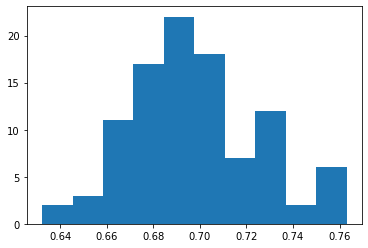

In [136]:
## 100 runs ?
roc_auc_list = []
for k in range(100):
    y = labels.sample(frac=1)
    X = embs ## OVERFIT
    model = LogisticRegression(max_iter=1000, random_state=0)
    model.fit(X,y)
    proba_pred = model.predict_proba(X)
    roc_auc = roc_auc_score(y, proba_pred[:, 1])
    roc_auc_list.append(roc_auc)
plt.hist(roc_auc_list)

In [137]:
print(np.mean(roc_auc_list))

0.6967988040123457


In [27]:
# shuffled labels in cross val ? # No overfit !
model = LogisticRegression(max_iter=1000, random_state=0)
proba_pred = cross_val_predict(model, X, y, cv=10, method='predict_proba')
roc_auc = roc_auc_score(y, proba_pred[:, 1])
print(roc_auc)

0.46749614197530864


(array([ 2.,  8., 10., 17., 19., 16., 15.,  7.,  5.,  1.]),
 array([0.38990162, 0.41374904, 0.43759645, 0.46144387, 0.48529128,
        0.5091387 , 0.53298611, 0.55683353, 0.58068094, 0.60452836,
        0.62837577]),
 <BarContainer object of 10 artists>)

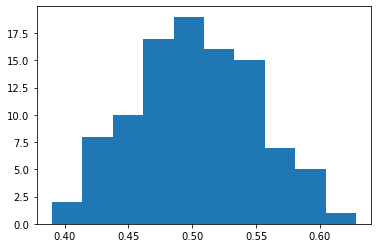

In [42]:
## do it 100 times and plot
roc_auc_list = []
for k in range(100):
    y = labels.sample(frac=1)
    model = LogisticRegression(max_iter=1000, random_state=0)
    proba_pred = cross_val_predict(model, X, y, cv=10, method='predict_proba')
    roc_auc = roc_auc_score(y, proba_pred[:, 1])
    roc_auc_list.append(roc_auc)
plt.hist(roc_auc_list)

In [43]:
print(np.mean(roc_auc_list))

0.5020534336419753


In [44]:
# and with reg ?
model = LogisticRegression(max_iter=1000, random_state=0, C=0.01, solver='liblinear', penalty='l2')
proba_pred = cross_val_predict(model, X, y, cv=10, method='predict_proba')
roc_auc = roc_auc_score(y, proba_pred[:, 1])
print(roc_auc)

0.5353491512345679


(array([  1.,   3.,  18., 103., 193., 266., 250., 120.,  43.,   3.]),
 array([0.29755015, 0.33270158, 0.36785301, 0.40300444, 0.43815586,
        0.47330729, 0.50845872, 0.54361015, 0.57876157, 0.613913  ,
        0.64906443]),
 <BarContainer object of 10 artists>)

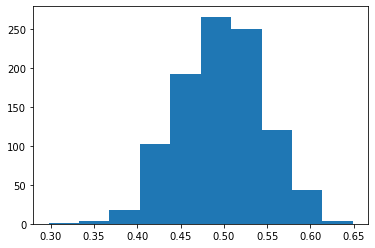

In [134]:
## do it 100 times and plot
roc_auc_list = []
for k in range(1000):
    y = labels.sample(frac=1)
    model = LogisticRegression(max_iter=1000, random_state=0, C=0.01, solver='liblinear', penalty='l2')
    proba_pred = cross_val_predict(model, X, y, cv=10, method='predict_proba')
    roc_auc = roc_auc_score(y, proba_pred[:, 1])
    roc_auc_list.append(roc_auc)
plt.hist(roc_auc_list)

In [135]:
print(len(roc_auc_list), np.mean(roc_auc_list))

1000 0.4961830150462963


/usr/lib/python3/dist-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/usr/lib/python3/dist-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/usr/lib/python3/dist-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/usr/lib/python3/dist-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/usr/lib/pyt

(array([ 1.,  2.,  2., 13., 21., 19., 17., 14.,  7.,  4.]),
 array([0.39742477, 0.41512828, 0.43283179, 0.4505353 , 0.46823881,
        0.48594232, 0.50364583, 0.52134934, 0.53905285, 0.55675637,
        0.57445988]),
 <BarContainer object of 10 artists>)

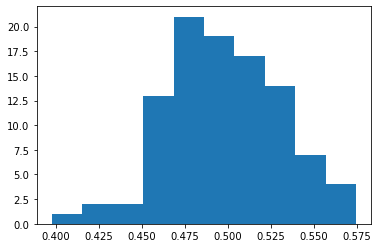

In [47]:
## do it 100 times and plot ##  SVC ?
roc_auc_list = []
for k in range(100):
    y = labels.sample(frac=1)
    model = SVC(kernel='linear', probability=True, max_iter=1000, random_state=0, C=0.01)
    proba_pred = cross_val_predict(model, X, y, cv=10, method='predict_proba')
    roc_auc = roc_auc_score(y, proba_pred[:, 1])
    roc_auc_list.append(roc_auc)
plt.hist(roc_auc_list)

In [48]:
print(np.mean(roc_auc_list))

0.49739583333333326


In [49]:
# real labels
y = labels.to_list()

## test gridsearch
#parameters={'alpha': [10**k for k in range(-3,3)], 'l1_ratio': np.linspace(0,1,21)}
#model = ElasticNet()
parameters={'C': [10**k for k in range(-3,3)]+[0.5,2]}
model = LogisticRegression(solver='liblinear', penalty='l2')
clf = GridSearchCV(model, parameters, cv=10, scoring='roc_auc')
clf.fit(X,y)
print(f'best params : {clf.best_params_}')
print(f'best score : {clf.best_score_}')

best params : {'C': 0.01}
best score : 0.8035353535353537


In [50]:
# get the probabilities
md = clf.best_estimator_
md.fit(X,y)
labels_proba = cross_val_predict(md, X, y, cv=10)

In [51]:
# shuffled labels : cv robust to grid search ??
y = labels.sample(frac=1)
## test gridsearch
#parameters={'alpha': [10**k for k in range(-3,3)], 'l1_ratio': np.linspace(0,1,21)}
#model = ElasticNet()
parameters={'C': [10**k for k in range(-3,3)]+[0.5,2]}
model = LogisticRegression(solver='liblinear', penalty='l2')
clf = GridSearchCV(model, parameters, cv=10, scoring='roc_auc')
clf.fit(X,y)
print(f'best params : {clf.best_params_}')
print(f'best score : {clf.best_score_}')

best params : {'C': 100}
best score : 0.43274170274170276


(array([  8.,  18.,  66., 109., 208., 224., 196., 112.,  43.,  16.]),
 array([0.37080808, 0.39786724, 0.42492641, 0.45198557, 0.47904473,
        0.5061039 , 0.53316306, 0.56022222, 0.58728139, 0.61434055,
        0.64139971]),
 <BarContainer object of 10 artists>)

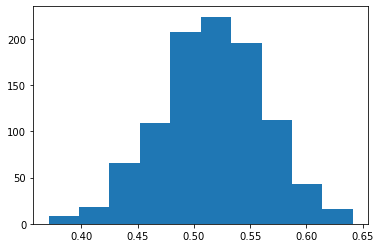

In [131]:
## 100 times
roc_auc_list = []
for k in range(1000):
    y = labels.sample(frac=1)
    ## test gridsearch
    #parameters={'alpha': [10**k for k in range(-3,3)], 'l1_ratio': np.linspace(0,1,21)}
    #model = ElasticNet()
    parameters={'C': [10**k for k in range(-3,3)]+[0.5,2]}
    model = LogisticRegression(solver='liblinear', penalty='l2')
    clf = GridSearchCV(model, parameters, cv=10, scoring='roc_auc')
    clf.fit(X,y)
    roc_auc_list.append(clf.best_score_)
plt.hist(roc_auc_list)

In [133]:
print(np.mean(roc_auc_list))

0.5165714357864358


In [90]:
# slight overfit ?? can we really perform a grid search ?
# same splits across calls : can adapt to the splits ?

# Repeat with stratification

In [109]:
embs = pd.read_csv('/neurospin/dico/jlaval/Output/V1_FIP_right/14-06-27_101/FIP_right_custom_embeddings/custom_cross_val_embeddings.csv')
labels = pd.read_csv('/neurospin/dico/data/deep_folding/current/datasets/hcp/FIP/FIP_labels.csv')
splits_basedir = '/neurospin/dico/data/deep_folding/current/datasets/hcp/FIP/split_'
labels = labels.loc[labels['Subject'].isin(embs['ID'])]
subjects = labels['Subject']
y = labels['Right_FIP'].tolist()
dims = [f'dim{k}' for k in range(1,33)]
X = embs[dims]


root_dir = '/'.join(splits_basedir.split('/')[:-1])
basedir = splits_basedir.split('/')[-1]
splits_dirs = [os.path.join(root_dir,f) for f in os.listdir(root_dir) if f.startswith(basedir) and '.csv' in f]
splits_subs = [pd.read_csv(file, header=None) for file in splits_dirs]
labels = np.concatenate([[i] * len(K) for i, K in enumerate(splits_subs)])
splits_subs_and_labels = pd.concat(splits_subs)
splits_subs_and_labels.columns=['ID']
splits_subs_and_labels['labels'] = labels
subs_embeddings = pd.DataFrame({'ID': subjects, 'X': list(X.values), 'Y': y})
df = subs_embeddings.merge(splits_subs_and_labels, on='ID')
groups, X, Y = df['labels'], np.vstack(df['X'].values), df['Y']
logo = LeaveOneGroupOut()
cv = logo.split(X, Y, groups=groups)

In [110]:
model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(X,y)
proba_pred = model.predict_proba(X)
roc_auc = roc_auc_score(y, proba_pred[:, 1])
print(roc_auc)

0.886766975308642


In [111]:
# cross val
model = LogisticRegression(max_iter=1000, random_state=0)
proba_pred = cross_val_predict(model, X, y, cv=cv, method='predict_proba')
roc_auc = roc_auc_score(y, proba_pred[:, 1])
print(roc_auc)

0.8030478395061728


In [112]:
embs = pd.read_csv('/neurospin/dico/jlaval/Output/V1_FIP_right/14-06-27_101/FIP_right_custom_embeddings/custom_cross_val_embeddings.csv')
labels = pd.read_csv('/neurospin/dico/data/deep_folding/current/datasets/hcp/FIP/FIP_labels.csv')
splits_basedir = '/neurospin/dico/data/deep_folding/current/datasets/hcp/FIP/split_'
labels = labels.loc[labels['Subject'].isin(embs['ID'])]
subjects = labels['Subject']
y = labels['Right_FIP'].tolist()
dims = [f'dim{k}' for k in range(1,33)]
X = embs[dims]


root_dir = '/'.join(splits_basedir.split('/')[:-1])
basedir = splits_basedir.split('/')[-1]
splits_dirs = [os.path.join(root_dir,f) for f in os.listdir(root_dir) if f.startswith(basedir) and '.csv' in f]
splits_subs = [pd.read_csv(file, header=None) for file in splits_dirs]
labels = np.concatenate([[i] * len(K) for i, K in enumerate(splits_subs)])
splits_subs_and_labels = pd.concat(splits_subs)
splits_subs_and_labels.columns=['ID']
splits_subs_and_labels['labels'] = labels
subs_embeddings = pd.DataFrame({'ID': subjects, 'X': list(X.values), 'Y': y})
df = subs_embeddings.merge(splits_subs_and_labels, on='ID')
groups, X, Y = df['labels'], np.vstack(df['X'].values), df['Y']
logo = LeaveOneGroupOut()
cv = logo.split(X, Y, groups=groups)

# better with reg ? : YES
model = LogisticRegression(max_iter=1000, random_state=0, C=0.01, solver='liblinear', penalty='l2')
proba_pred = cross_val_predict(model, X, y, cv=cv, method='predict_proba')
roc_auc = roc_auc_score(y, proba_pred[:, 1])
print(roc_auc)

0.8177083333333333


In [118]:
# shuffled labels
roc_auc_list=[]
for k in range(100):
    embs = pd.read_csv('/neurospin/dico/jlaval/Output/V1_FIP_right/14-06-27_101/FIP_right_custom_embeddings/custom_cross_val_embeddings.csv')
    labels = pd.read_csv('/neurospin/dico/data/deep_folding/current/datasets/hcp/FIP/FIP_labels.csv')
    splits_basedir = '/neurospin/dico/data/deep_folding/current/datasets/hcp/FIP/split_'
    labels = labels.loc[labels['Subject'].isin(embs['ID'])]
    subjects = labels['Subject']
    y = labels.sample(frac=1)['Right_FIP'].tolist()
    dims = [f'dim{k}' for k in range(1,33)]
    X = embs[dims]


    root_dir = '/'.join(splits_basedir.split('/')[:-1])
    basedir = splits_basedir.split('/')[-1]
    splits_dirs = [os.path.join(root_dir,f) for f in os.listdir(root_dir) if f.startswith(basedir) and '.csv' in f]
    splits_subs = [pd.read_csv(file, header=None) for file in splits_dirs]
    labels = np.concatenate([[i] * len(K) for i, K in enumerate(splits_subs)])
    splits_subs_and_labels = pd.concat(splits_subs)
    splits_subs_and_labels.columns=['ID']
    splits_subs_and_labels['labels'] = labels
    subs_embeddings = pd.DataFrame({'ID': subjects, 'X': list(X.values), 'Y': y})
    df = subs_embeddings.merge(splits_subs_and_labels, on='ID')
    groups, X, Y = df['labels'], np.vstack(df['X'].values), df['Y']
    logo = LeaveOneGroupOut()
    cv = logo.split(X, Y, groups=groups)

    # cross val
    model = LogisticRegression(max_iter=1000, random_state=0)
    proba_pred = cross_val_predict(model, X, y, cv=cv, method='predict_proba')
    roc_auc = roc_auc_score(y, proba_pred[:, 1])
    roc_auc_list.append(roc_auc)

(array([ 1.,  1.,  4.,  2., 17., 16., 24., 19., 10.,  6.]),
 array([0.3275463 , 0.35418596, 0.38082562, 0.40746528, 0.43410494,
        0.4607446 , 0.48738426, 0.51402392, 0.54066358, 0.56730324,
        0.5939429 ]),
 <BarContainer object of 10 artists>)

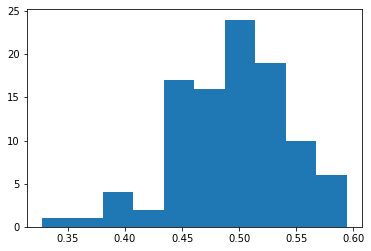

In [119]:
plt.hist(roc_auc_list)

In [120]:
np.mean(roc_auc_list)

0.4935026041666667

In [ ]:
## change the stratif according to the fake labels ?